In [1]:
%matplotlib inline
import statistics as std
import pandas as pd                                 
import numpy as np                          #Importando os módulos necessários
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.time import Time
from astropy.io.fits import HDUList

In [2]:
it = ['2019-01-11T21:00:00']                             #Inicio das observaçoes
itime = Time(it, format = 'isot', scale = 'utc' )

In [3]:
file = open('logfile','r')                       #Abrindo o arquivo com os dados
fwhm = []                                        #Lista vazia para salvar os valores do fwhm

for indice, linha in enumerate(file):            #Loop para ler as linhas apartir da 480 e pegar o fwhm
    if indice >=1:
        if linha[:47] == '  Average full width at half maximum (FWHM) of ': 
            fwhm.append(float(linha[47:]))
        elif linha[:39] == '  Full width at half maximum (FWHM) of ':
            fwhm.append(float(linha[39:]))
            
fwhm = sorted(fwhm)

<h1>750</h1>

In [4]:
##### imagens usadas no psfmeasure = 5,10,15,20,25,30,35,40,45,50

name = '750_60s_b2x2-001_R.fit'
imagens = []                                                        #Lista com o nome das imagens

for i in range(4,51,5):       
    if i < 9:                                                      #Para imagens 001 ate 009 
        number = name[13:16].replace(name[15],str(int(name[15])+i))   
        imagens.append('750_60s_b2x2-' + str(number) + '_R.fit' )
for i in range(0,51,5):       
    if i > 9:                                       #Para imagens 010 ate 099 
        name = '750_60s_b2x2-010_R.fit'
        number = name[15:16].replace(name[15],str(int(name[15])+i))
        imagens.append('750_60s_b2x2-0' + str(number) + '_R.fit' )

In [5]:
datas = []                                                #Lista com as datas

for i in imagens:                                        #Iterando dentro da lista com os nomes
    with fits.open(i) as hdul:                           #Abrindo cada elemento da lista imagens
        for hdu in hdul:                                 #Extraindo o header de cada imagem
            datas.append(hdul[0].header['DATE-OBS'])
            
tempos = Time(datas, format = 'isot', scale = 'utc')      #Instanciando a classe Time com os dados

dt = []                                                   #Inicializando a lista com os pontos
t = np.empty(len(tempos))                                 #Inicializando array para plotar

for i in range(len(tempos)):
    dt.append(tempos[i] - itime)
    t[i] = (dt[i].value)*24                               #Calculando os valores de dt em HORAS
    
t = sorted(t)

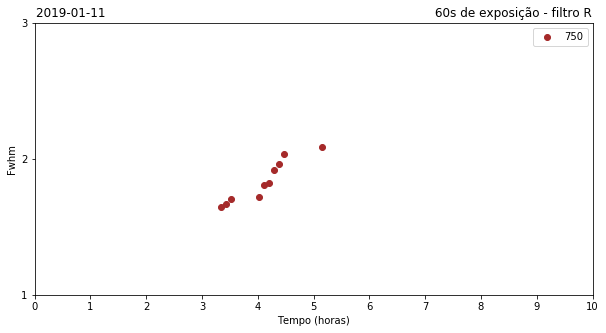

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(t, fwhm, color = 'brown',label = '750')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-11' + ' '*85 + '60s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.savefig('2019-01-11_scatterfwhmxtime.png')
plt.legend()
plt.show()

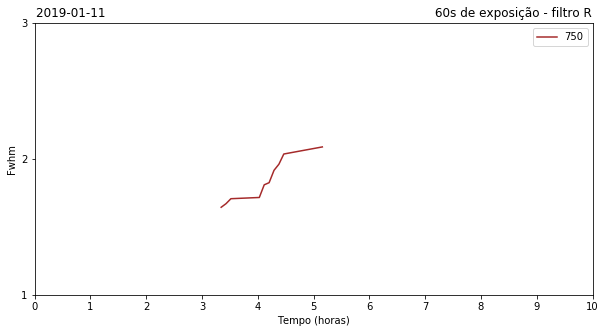

In [7]:
plt.figure(figsize=(10,5))
plt.plot(t, fwhm, color = 'brown', label='750')
plt.yticks(np.arange(1, 4, 1)) 
plt.xticks(np.arange(0, 11, 1)) 
plt.title('2019-01-11' + ' '*85 + '60s de exposição - filtro R')
plt.ylabel('Fwhm')
plt.xlabel('Tempo (horas)')
plt.savefig('2019-01-11_plotfwhmxtime.png')
plt.legend()
plt.show()

In [8]:
mean_fwhm = std.mean(fwhm)
median_fwhm = std.median(fwhm)

print(mean_fwhm)
print(median_fwhm)

1.83733
1.8172
